# Part 1

In [49]:
class GeneralNeuron:
    def __init__(self, firing_rate):
        self.firing_rate = firing_rate

    def activate(self, stimulus_strength):
        pass  # פונקציה לחישוב קצב הירי על פי עוצמת הגירוי


class SensoryNeuron(GeneralNeuron):
    def __init__(self, firing_rate, receptor_type):
        super().__init__(firing_rate)
        self.receptor_type = receptor_type

    def sense_stimulus(self, stimulus):
        pass  # עיבוד הגירוי הספציפי


class Photoreceptor(SensoryNeuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate, receptor_type="light")

    def light_detection(self, light_intensity):
        pass  # התנהגות ייחודית לקליטת אור

    def light_response(self, light_intensity):
        pass

class Mechanoreceptor(SensoryNeuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate, receptor_type="pressure")

    def pressure_detection(self, pressure_level):
        pass  # התנהגות ייחודית לקליטת לחץ


class MotorNeuron(GeneralNeuron):
    def __init__(self, firing_rate, target_muscle):
        super().__init__(firing_rate)
        self.target_muscle = target_muscle

    def control_muscle(self):
        pass  # שליטה בשריר על פי רמת ההפעלה


class AlphaMotorNeuron(MotorNeuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate, target_muscle="skeletal muscle")

    def skeletal_muscle_control(self):
        pass  # שליטה ייחודית בשרירי שלד


class GammaMotorNeuron(MotorNeuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate, target_muscle="muscle spindle")

    def muscle_spindle_control(self):
        pass  # שליטה ייחודית בכישור השריר


In [ ]:
#שאלות
# מוטור האם הפונקציה צריכה לקבל פרמטר  activation level
# בילדים של המוטור האם צריך לדרוס את הפונקציה של השליטה והאם יש שם עוד פונקציה שצריך להגדיר

# Part 2

## Q1

In [27]:
import numpy as np

def find_max_min(arr):
    max_indexes = []
    min_indexes = []
    
    # לולאה על כל איברי המערך (למעט הקצוות)
    for i in range(1, len(arr) - 1):
        if arr[i] > arr[i - 1] and arr[i] > arr[i + 1]:
            max_indexes.append(i)  # מקסימום מקומי
        elif arr[i] < arr[i - 1] and arr[i] < arr[i + 1]:
            min_indexes.append(i)  # מינימום מקומי
    
    return max_indexes, min_indexes


def downsample_signal(signal, downsample_factor=5):
    # מציאת אינדקסים של מקסימום ומינימום
    max_indexes, min_indexes = find_max_min(signal)
    # יצירת רשימה של כל אינדקסי המקסימום והמינימום
    min_max_indexes = np.sort(np.concatenate((max_indexes, min_indexes)))
    
    # דגימה מחדש: לקיחת כל נקודה חמישית בנוסף לנקודות הקיצון
    downsampled_indices = np.arange(0, len(signal), downsample_factor)
    combined_indices = np.unique(np.concatenate((downsampled_indices, min_max_indexes)))
    
    return signal[combined_indices]

# יצירת אות סינוסואידלי לדוגמה
time = np.arange(0, 1, 0.01)  # 1 שניה עם דגימה כל 0.01 שניות
frequency = 5  # תדר 5Hz
original_signal = np.sin(2 * np.pi * frequency * time)

downsampled_signal = downsample_signal(original_signal)

# Verify
print('length of downsampled_signal is',len(downsampled_signal), 'should be around 20% of original length ',len(original_signal))

max_indexes, min_indexes = find_max_min(original_signal)
max_min_indexes = np.concatenate((max_indexes, min_indexes))

for i in range(len(max_min_indexes)):
    if(original_signal[max_min_indexes[i]] not in downsampled_signal):
       print("error - missing minimum or maximum value")

length of downsampled_signal is 20 should be around 20% of original length  100


## Q2

### Point 1

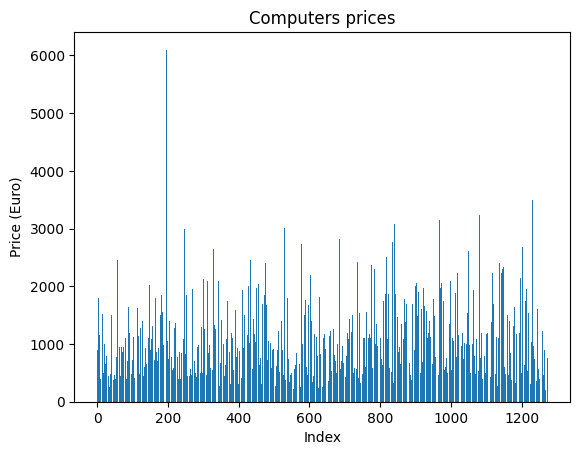

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("laptop_price - dataset.csv")

laptop_ids = np.arange(0, len(df))
laptop_prices = df['Price (Euro)']

# יצירת גרף
plt.bar(laptop_ids, laptop_prices)
plt.title('Computers prices')
plt.xlabel('Index')
plt.ylabel('Price (Euro)')
plt.show()

### Point 2

In [48]:
average_price_per_company = df.groupby('Company')['Price (Euro)'].mean()
print(average_price_per_company)
# מציאת החברה עם הממוצע הגבוה ביותר
company_with_max_average = average_price_per_company.idxmax()
max_average_price = average_price_per_company.max()
print(f"The company with the highest average price is {company_with_max_average} with an average price of {max_average_price} Euro")

Company
Acer          633.464455
Apple        1564.198571
Asus         1123.829737
Chuwi         314.296667
Dell         1199.225120
Fujitsu       729.000000
Google       1677.666667
HP           1080.314664
Huawei       1424.000000
LG           2099.000000
Lenovo       1093.862215
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price (Euro), dtype: float64
The company with the highest average price is Razer with an average price of 3346.1428571428573 Euro
